# Introduction # 

This is a simple, portable robot simulator developed by Student Robotics. Some of the arenas and the exercises have been modified for the Research Track I first assignment. In this configuration, the robot should arrange the silver and golden tokens such that all silver tokens and placed next to the golden ones. For this assignment, we have two different sets of codes for the completion of the same project. The goal is to analyze and test which of the code performs better in terms of time/efficiency. We are checking which one of the robots can pick the tokens faster over time. To do this, some changes were added to the arena environment to make it more complex. More tokens were added to the arena, now in total 20 tokens instead of 12. Adding to that, the tokens are now placed more randomly meaning the golden or silver tokens are randomly places in the outer and inner circle. Please refer to the image below to have a better idea of the changes added to the arena: 

![New arena](newarena.png) 

As mentioned before, two sets of codes were taken and compared. The two robots start in the same arena as shown in the image above. Their goals are to join 6 silver tokens to the other 6 golden tokens. The test is to verify which one of the robot is faster/more efficient in collecting the tokens over time (from 0 to 200 seconds). The data was collected and organized in the table below. 

![Result table](testtable.png) 


# Paired T-Test #

It is not enough to deduct that ines_robot is more efficient because it was able to successfully organize 5 pairs of tokens at 200s whereas aicha_robot was only able to reach 3 pairs at 200s. Therefore, it is necessary to conduct a paired t-test. 

A paired t-test is an appropriate statistical test for this project because it compares the means of two related samples taken from the same subjects. In other words, I have collected measurements of the number of boxes picked up by robot_Ines and robot_Aicha over time in the same arena. The t-test is also a right choice looking at the small size of the sample which is only 20 samples. The end-goal is to determine if there is a significant difference in performance between the two robots, therefore the hypothesis are as follows: 
1. Null hypothesis (H0): There is no difference between the "Ines-robot" and "Aicha-robot" measurements over time.
2. Alternative hypothesis (Ha): The "Ines-robot" measurements are consistently different could be higher or lower than the "Aicha-robot" measurements over time.

In [14]:
#importing required libraries 
import pandas as pd
from scipy import stats
import numpy as np
from scipy.stats import t
from scipy.stats import chi2
import matplotlib.pyplot as plt

Transfering the collected data from the excel table to here 

In [15]:
data = {
    'Time': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120, 130, 140, 150, 160, 170, 180, 190, 200],
    'robot_Ines': [0, 1, 2, 2, 2, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5],
    'robot_Aicha': [0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 3, 3, 3, 3]
}

df = pd.DataFrame(data)



### Calculating mean ###


In [16]:
mean_ines = df['robot_Ines'].mean()
mean_aicha = df['robot_Aicha'].mean()

print('Mean (robot_Ines):', mean_ines)
print('Mean (robot_Aicha):', mean_aicha)


Mean (robot_Ines): 3.3
Mean (robot_Aicha): 1.35


The above mean that the robot_Aicha picked up approximately 1.35 boxes on average and robot_ines picked up approximately 3.3 boxes on average. Looking at the resultant mean, it is deductible that on average, robot_Ines picked up a higher number of boxes compared to robot_Aicha over time. Therefore, the results suggest that robot_Ines performed better or faster. 

IMPORTANT however, it's important to note that this interpretation is based solely on the mean values and does not take into account the statistical significance or variability of the measurements. For this reason, further test are conducted to reach a conclusion on the performance of the two robots. 

In [17]:
df = pd.DataFrame(data)


Note: the confidence level is usually 95% in engineering and scientific research and that is the value taken in this test. 

In [18]:
confidence_level = 0.95
degrees_of_freedom = len(df) - 1

ci_mean_ines = t.interval(confidence_level, degrees_of_freedom, loc=mean_ines, scale=df['robot_Ines'].std() / np.sqrt(len(df['robot_Ines'])))
ci_mean_aicha = t.interval(confidence_level, degrees_of_freedom, loc=mean_aicha, scale=df['robot_Aicha'].std() / np.sqrt(len(df['robot_Aicha'])))

print('95% Confidence Interval for the Mean (robot_Ines):', ci_mean_ines)
print('95% Confidence Interval for the Mean (robot_Aicha):', ci_mean_aicha)


95% Confidence Interval for the Mean (robot_Ines): (2.6539937696601483, 3.9460062303398513)
95% Confidence Interval for the Mean (robot_Aicha): (0.8180042418383868, 1.8819957581616134)


Looking at these number, then we can state with 95% confidence and as also confirmed from the previous mean result, this reconfirms that on average robot_Ines is more efficient/faster than robot_Aicha in picking up boxes over time. 

Calculate Standard Deviation

In [19]:
std_ines = df['robot_Ines'].std()
std_aicha = df['robot_Aicha'].std()

print('Standard Deviation (robot_Ines):', std_ines)
print('Standard Deviation (robot_Aicha):', std_aicha)


Standard Deviation (robot_Ines): 1.3803127029389888
Standard Deviation (robot_Aicha): 1.1367080817685318


Looking at the obtained result, for robot_Ines, the measurements of the number of boxes picked up tend to deviate by approximately 1.38 boxes on average. Thus, this is moderate level of variability around the mean. Similarly, for robot_Aicha, the measurements of the number of boxes picked up tend to deviate by approximately 1.36 boxes on average. Thus, this is moderate level of variability around the mean. When comparing the two, then we can say that robot_Ines show a slightly larger spread compared to robot_Aicha.

In [20]:
confidence_level = 0.95
degrees_of_freedom = len(df) - 1

ci_std_ines = np.sqrt((len(df['robot_Ines']) - 1) * std_ines**2 / chi2.interval(confidence_level, degrees_of_freedom)[::-1])
ci_std_aicha = np.sqrt((len(df['robot_Aicha']) - 1) * std_aicha**2 / chi2.interval(confidence_level, degrees_of_freedom)[::-1])

print('95% Confidence Interval for the Standard Deviation (robot_Ines):', ci_std_ines)
print('95% Confidence Interval for the Standard Deviation (robot_Aicha):', ci_std_aicha)


95% Confidence Interval for the Standard Deviation (robot_Ines): [1.04971455 2.01604558]
95% Confidence Interval for the Standard Deviation (robot_Aicha): [0.86445558 1.66024358]


Similarly to the results obtained in the previous cell, it also shows that robot_Ines show a slightly larger spread compared to robot_Aicha with a confidence of 95%

In [21]:
result = stats.ttest_rel(df['robot_Ines'], df['robot_Aicha'])


In [22]:
print('Below is the paired t-test result:')
print('t-statistic:', result.statistic)
print('p-value:', result.pvalue)


Below is the paired t-test result:
t-statistic: 14.418962335069185
p-value: 1.1004817358368142e-11


### 2 Tailed T-test ###

The 2 tailed t-test is used to either reject or accept the null hypothesis set at the beginning. In other words, the 2 tailed t-test can also suggest whether the performance of the two robots is the same (null hypothesis) or if it is different (Alternative hypothesis). 

==> The P-value, 1.1004817358368142e-11, is very small near 0 therefore the initial assumption null hypothesis is true must be incorrect. We reject the null hypothesis H0: There is no difference between the "Ines-robot" and "Aicha-robot" measurements over time. Additionally, the positive t-statistic value of 14.42 indicates that the mean number of boxes picked up by robot_Ines is larger than the mean number of boxes picked up by robot_Aicha which also confirms the Alternative hypothesis Ha: The "Ines-robot" measurements are consistently different could be higher or lower than the "Aicha-robot" measurements over time.

### 1 Tailed T-test ###

Contrary to the 2 tailed t-test, the 1 tailed test is helpful to understand which code performs better.
==> The P-value, 1.1004817358368142e-11, is less than the significance level $\alpha$= 0.05 therefore we can conclude that robot_ines outperforms robot_Aicha. These conclusion can also be well interpreted from the line plot below. 

### Line Plot Display Data ###

Calculate the differences between robot_Ines and robot_Aicha:


In [23]:
differences = df['robot_Ines'] - df['robot_Aicha']


Line Plot

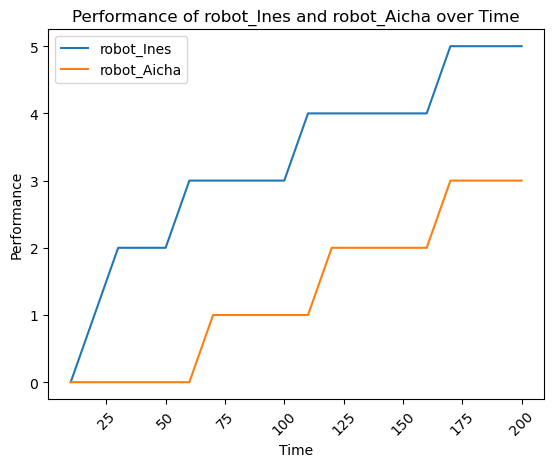

In [24]:
plt.plot(df['Time'], df['robot_Ines'], label='robot_Ines')
plt.plot(df['Time'], df['robot_Aicha'], label='robot_Aicha')
plt.xlabel('Time')
plt.ylabel('Performance')
plt.title('Performance of robot_Ines and robot_Aicha over Time')
plt.legend()
plt.xticks(rotation=45)
plt.show()


The line plot above shows that the performance of robot_ines (blue line) was higher/above the performance of robot_aicha (orange line) during the whole period (0 to 200 seconds). This confirms the results deducted in the section earlier where it was stated that robot_Aicha and robot_Ines perform differently and we can even conclude that robot_ines outperforms robot_ines. 